In [1]:
%matplotlib inline 

In [2]:
# all imports should go here

import sys
import os
import subprocess
import datetime
import platform

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

import cartopy.crs as ccrs
from cartopy.io.img_tiles import OSM
import cartopy.feature as cfeature
from cartopy.io import shapereader
from cartopy.io.img_tiles import StamenTerrain
from cartopy.io.img_tiles import GoogleTiles
from owslib.wmts import WebMapTileService

from matplotlib.path import Path
import matplotlib.patheffects as PathEffects
import matplotlib.patches as mpatches

import numpy as np

In [3]:
# show info to support reproducability

def python_env_name():
    envs = subprocess.check_output('conda env list').splitlines()
    # get unicode version of binary subprocess output
    envu = [x.decode('ascii') for x in envs]
    active_env = list(filter(lambda s: '*' in str(s), envu))[0]
    env_name = str(active_env).split()[0]
    return env_name
#end python_env_name

print('python version : ' + sys.version)
print('python environment :', python_env_name())
print('pandas version : ' + pd.__version__)

print('current wkg dir: ' + os.getcwd())
print('Notebook run at: ' + str(datetime.datetime.now())+ ' local time')
print('Notebook run at: ' + str(datetime.datetime.utcnow()) + ' UTC') 
print('Notebook run on: ' + platform.platform())

python version : 3.5.2 |Anaconda custom (64-bit)| (default, Jul  5 2016, 11:41:13) [MSC v.1900 64 bit (AMD64)]
python environment : root
pandas version : 0.21.0
current wkg dir: C:\Users\donrc\Documents\JupyterNotebooks\CartopyNotebookProject\develop
Notebook run at: 2017-11-16 13:29:04.047559 local time
Notebook run at: 2017-11-16 03:29:04.047559 UTC
Notebook run on: Windows-10-10.0.16299-SP0


In [4]:
# path to saved figures
FIGURE_PREFIX = '../figures/'

D:\Anaconda3\lib\site-packages\matplotlib\ticker.py:1693: UserWarning: Steps argument should be a sequence of numbers
increasing from 1 to 10, inclusive. Behavior with
values outside this range is undefined, and will
raise a ValueError in future versions of mpl.
  warnings.warn('Steps argument should be a sequence of numbers\n'


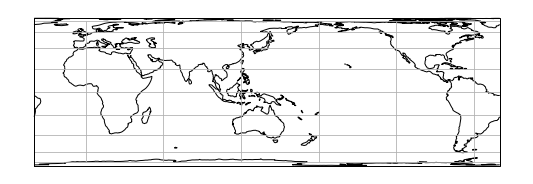

In [5]:


plt.figure(figsize=(9.42477796077, 3))
ax = plt.axes(projection=ccrs.LambertCylindrical(central_longitude=140))
ax.coastlines(resolution='110m')
ax.gridlines()

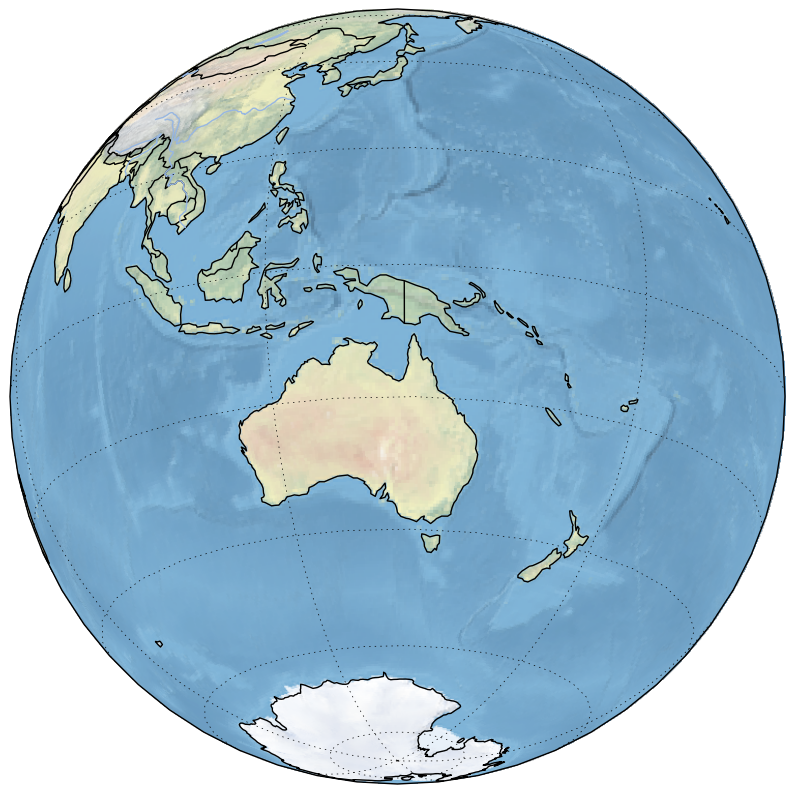

In [24]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=140, central_latitude=-20,))
#ax.stock_img()
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS,)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.LAKES)

ax.gridlines()

-3339584.723798206 -6413524.5941636395
1669792.3618991044 -553583.8468157637
Adding gas fields ...


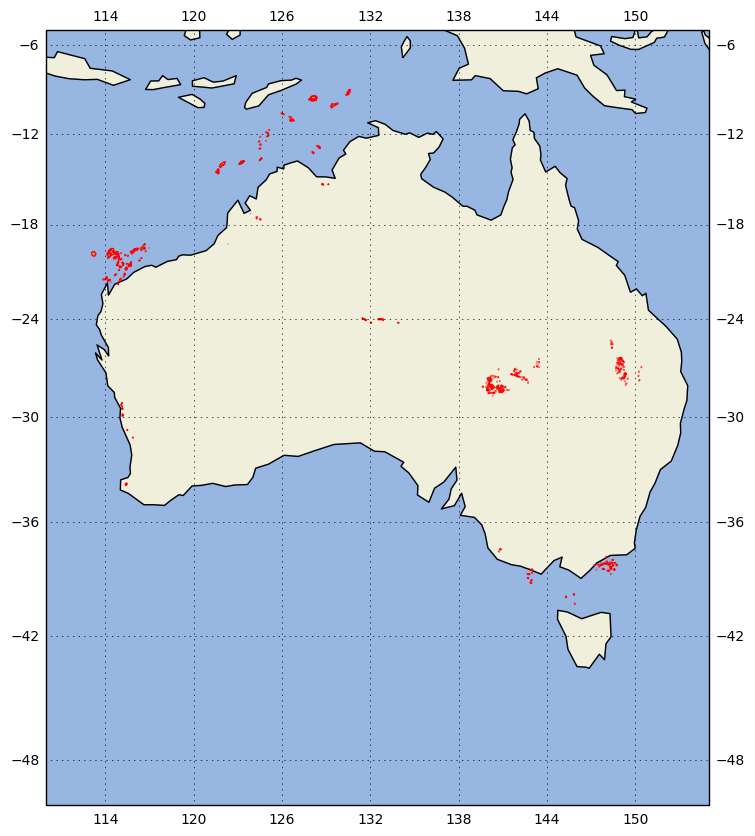

In [44]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.Mercator(central_longitude=140, ))


xm, ym = ccrs.Mercator(central_longitude=140, ).transform_point(110, -50, ccrs.PlateCarree() )
xm2, ym2 = ccrs.Mercator(central_longitude=140, ).transform_point(155, -5, ccrs.PlateCarree() )
print(xm, ym)  
print(xm2, ym2)
                                                              
#ax.set_extent([110, 155, -40,-10], crs=ccrs.PlateCarree())
ax.set_extent([xm, xm2, ym, ym2], crs=ccrs.Mercator(central_longitude=140, )  )
#ax.stock_img()
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
#ax.add_feature(cfeature.BORDERS,)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.LAKES)
ax.gridlines(draw_labels=True,)

print('Adding gas fields ...')
add_shp = '../data/fields'

shp = shapereader.Reader(add_shp)
add_s = shp.records()
ADD_alpha = 0.99

for add in add_s:
    if( add.geometry == None):
        pass
    else:
        ax.add_geometries([add.geometry], ccrs.PlateCarree(),\
                          edgecolor='red',  facecolor='tan', alpha = ADD_alpha)        
    #end if

#end for

Adding gas fields ...
Adding gas fields ...
Adding gas fields ...
Adding gas fields ...
Adding gas fields ...
Adding gas fields ...


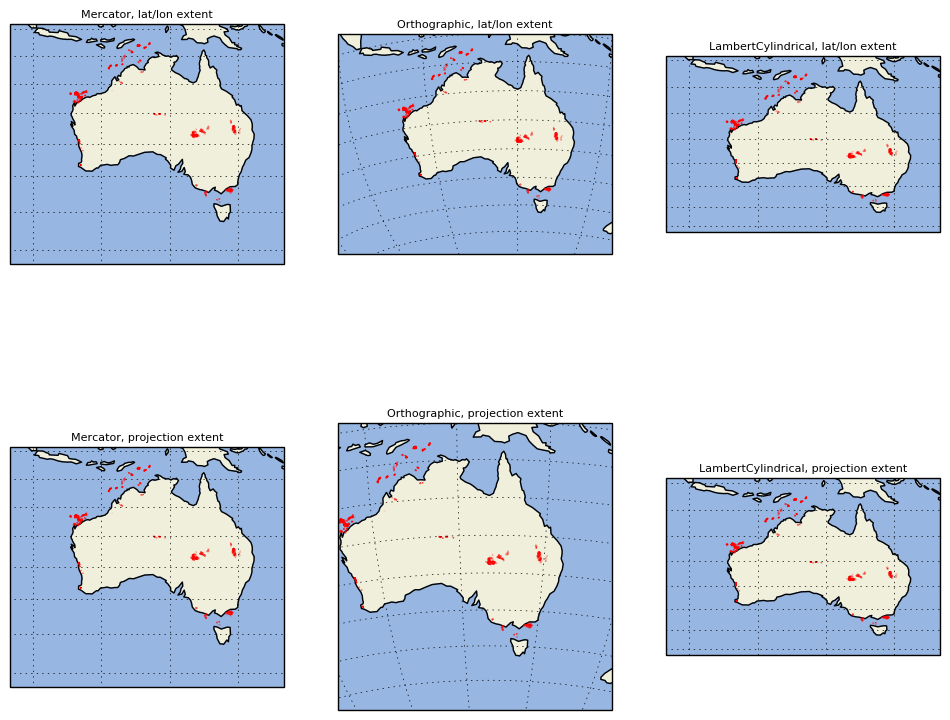

In [103]:
def show_fields(rows, cols, num, proj=ccrs.PlateCarree(), isExtentPC=True):

    ax = plt.subplot(rows*100+cols*10+num, projection=proj)

    x0 = 100
    x1 = 160
    y0 = -50
    y1 = -5

    xm, ym = proj.transform_point(x0, y0, ccrs.PlateCarree() )
    xm2, ym2 = proj.transform_point(x1, y1, ccrs.PlateCarree())

    if( isExtentPC):
        ax.set_extent([x0, x1, y0, y1],crs=ccrs.PlateCarree())
    else:
        ax.set_extent([xm, xm2, ym, ym2], crs=proj  )
    #end if

    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.RIVERS)
    
    gl = ax.gridlines(draw_labels=False,)
    gl.xlabels_top = False
    gl.ylabels_right = False


    print('Adding gas fields ...')
    add_shp = '../data/fields'

    shp = shapereader.Reader(add_shp)
    add_s = shp.records()
    ADD_alpha = 0.99

    for add in add_s:
        if( add.geometry == None):
            pass
        else:
            ax.add_geometries([add.geometry], ccrs.PlateCarree(),\
                              edgecolor='red',  facecolor='tan', alpha = ADD_alpha)        
        #end if
    #end for


    return ax
#end show_fields


plt.figure(figsize=(12,10))
prj1 = ccrs.Mercator(central_longitude=140, )
prj2 = ccrs.Orthographic(central_longitude=140, central_latitude=-20,)
prj3 = ccrs.LambertCylindrical(central_longitude=140)




rows = 2
cols = 3

show_fields(rows, cols, 1, prj1).set_title('Mercator, lat/lon extent', fontsize=8)
show_fields(rows, cols, 2, prj2).set_title('Orthographic, lat/lon extent', fontsize=8)
show_fields(rows, cols, 3, prj3).set_title('LambertCylindrical, lat/lon extent', fontsize=8)
show_fields(rows, cols, 4, prj1, isExtentPC = False).set_title('Mercator, projection extent', fontsize=8 )
show_fields(rows, cols, 5, prj2, isExtentPC = False).set_title('Orthographic, projection extent', fontsize=8)
show_fields(rows, cols, 6, prj3, isExtentPC = False).set_title('LambertCylindrical, projection extent', fontsize=8)

plt.show()

Adding gas fields ...


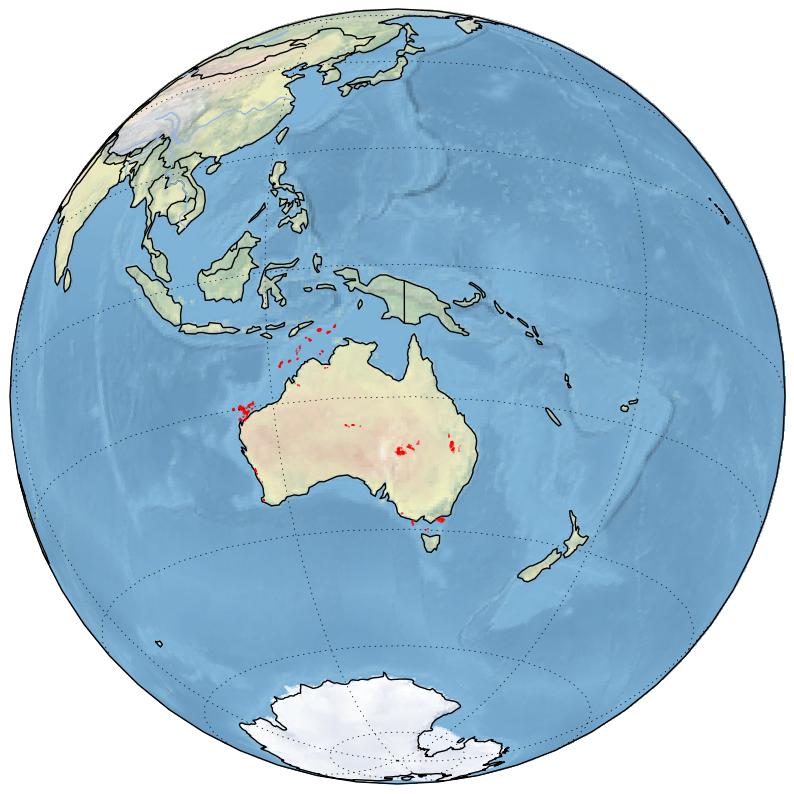

In [89]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=140, central_latitude=-20,))
ax.stock_img()
#ax.add_feature(cfeature.LAND)
#ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS,)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.LAKES)

print('Adding gas fields ...')
add_shp = '../data/fields'

shp = shapereader.Reader(add_shp)
add_s = shp.records()
ADD_alpha = 0.99

for add in add_s:
    if( add.geometry == None):
        pass
    else:
        ax.add_geometries([add.geometry], ccrs.PlateCarree(),\
                          edgecolor='red',  facecolor='tan', alpha = ADD_alpha)        
    #end if
#end for

ax.gridlines()